In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [233]:
df=pd.read_csv("C:/Srestha/Steel Price pred.csv")

In [234]:
df.head(15)

,Date,y,Coal_coking,Iron_ore,Steel_scrap,Fe_silicon,China_PMI,PMI_raw,PMI_prod,PMI_fin,Days_diff
0,01-08-2011,527.136857,NaN,NaN,NaN,NaN,472.07714,47.7,54.0,47.5,-1888
1,01-09-2011,543.417563,NaN,NaN,NaN,NaN,466.62656,49.7,52.2,57.4,-1857
2,01-10-2011,501.497753,NaN,NaN,NaN,NaN,434.48328,44.2,46.4,67.2,-1827
3,01-11-2011,498.244650,NaN,NaN,NaN,NaN,424.40370,36.2,38.3,63.1,-1796
4,01-12-2011,514.373437,NaN,NaN,NaN,NaN,432.02670,48.3,53.0,50.0,-1766
5,01-01-2012,508.896669,NaN,NaN,NaN,NaN,412.01940,50.2,55.4,56.8,-1735
6,01-02-2012,504.919425,NaN,NaN,NaN,NaN,423.74880,45.7,39.4,60.6,-1704
7,01-03-2012,529.676890,NaN,NaN,344.872694,NaN,445.29129,43.3,46.5,46.5,-1675
8,01-04-2012,537.384584,NaN,NaN,348.557692,NaN,448.19437,49.2,60.3,50.8,-1644
9,01-05-2012,531.972806,NaN,NaN,348.149742,NaN,418.19904,48.2,53.9,61.6,-1614


In [235]:
y=df.y

In [236]:
features=["Coal_coking","Iron_ore","Steel_scrap","Fe_silicon","China_PMI","PMI_raw","PMI_prod","PMI_fin","Days_diff"]

In [237]:
X=df[features]

In [238]:
X.head()

,Coal_coking,Iron_ore,Steel_scrap,Fe_silicon,China_PMI,PMI_raw,PMI_prod,PMI_fin,Days_diff
0,NaN,NaN,NaN,NaN,472.07714,47.7,54.0,47.5,-1888
1,NaN,NaN,NaN,NaN,466.62656,49.7,52.2,57.4,-1857
2,NaN,NaN,NaN,NaN,434.48328,44.2,46.4,67.2,-1827
3,NaN,NaN,NaN,NaN,424.40370,36.2,38.3,63.1,-1796
4,NaN,NaN,NaN,NaN,432.02670,48.3,53.0,50.0,-1766


In [239]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9, test_size=0.1,random_state=0)

In [240]:
from sklearn.impute import SimpleImputer
my_imputer=SimpleImputer()
imputed_X_train=pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns


In [241]:
model = RandomForestRegressor(n_estimators=400, random_state=0)
model.fit(imputed_X_train, y_train)
pred = model.predict(imputed_X_valid)
print("Mean Absolute Error :")
print(mean_absolute_error(y_valid, pred))

Mean Absolute Error :
12.501560567288415


In [242]:
print(pred)
y_valid.head(13)

[515.3955607  284.09321884 352.69037134 442.46211692 433.19669654
 472.471689   298.44178273 492.35793675 509.05361343 486.04160518
 476.77274144 459.66690087 475.82481853]


8      537.384584
50     277.462950
43     375.756258
24     442.296151
63     438.202309
98     463.712758
54     288.713543
90     507.410659
7      529.676890
111    494.174979
10     513.177725
71     463.394849
97     472.590764
Name: y, dtype: float64

In [243]:
print(np.mean(np.abs((y_valid-pred)/y_valid))*100)

2.7805404093370947


In [244]:
imputed_X= pd.DataFrame(my_imputer.transform(X))
imputed_X.columns = X_train.columns
preds=model.predict(imputed_X)
print("Mean Absolute Error :")
print(mean_absolute_error(y, preds))


Mean Absolute Error :
7.987363371549728


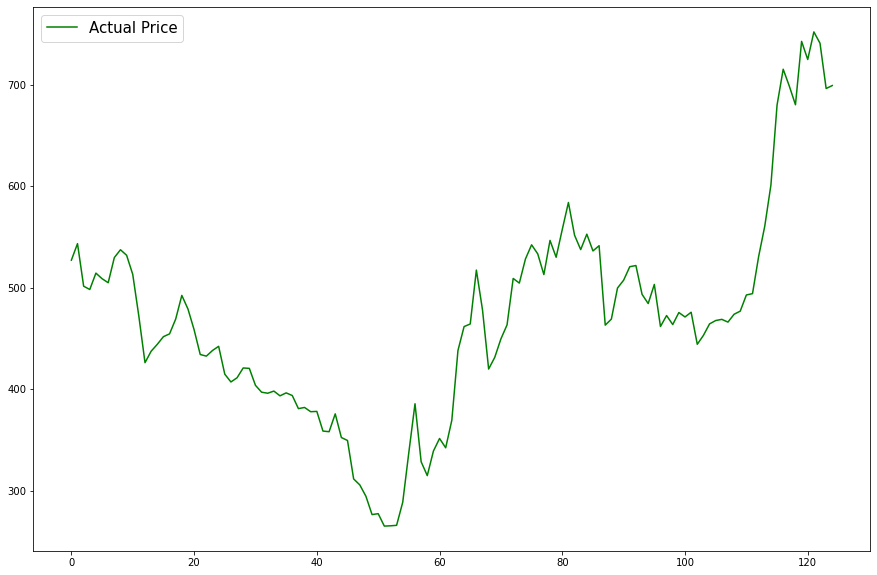

In [245]:
plt.plot(df['y'],color="green",label="Actual Price")
plt.xlabel="Date"
plt.ylabel="Price Trend"
plt.legend(loc='best',prop={"size":15})
plt.rcParams['figure.figsize'] = [15,10]
plt.show()

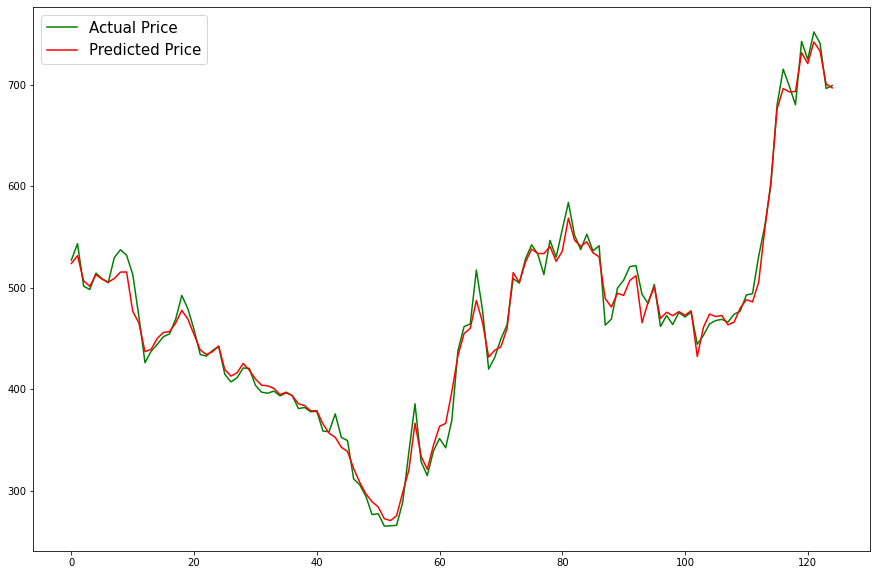

In [246]:
plt.plot(df['y'],color="green",label="Actual Price")
plt.plot(preds,color="red",label="Predicted Price")
plt.xlabel="Date"
plt.ylabel="Price Trend"
plt.legend(loc='best',prop={"size":15})
plt.rcParams['figure.figsize'] = [15,10]
plt.show()

In [247]:
output = pd.DataFrame({'Date':df.Date,'Actual Price':df.y,'Predicted Price': preds})

In [249]:
output.to_csv('C:/Srestha/Prediction.csv', index=False)

In [250]:
data=pd.read_csv('C:/Srestha/Prediction.csv')

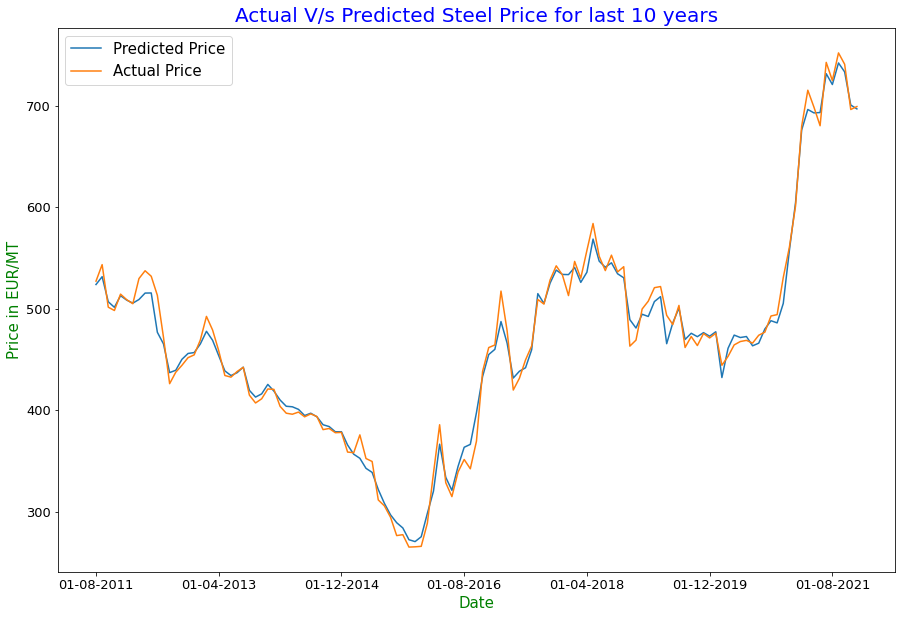

In [252]:
p=data.plot(x="Date", y=["Predicted Price","Actual Price"],fontsize=13)
p.set_xlabel("Date",fontsize=15,color="green")
p.set_ylabel("Price in EUR/MT",fontsize=15,color="green")
plt.legend(loc='best',prop={'size':15})
plt.title("Actual V/s Predicted Steel Price for last 10 years",fontsize=20,color="blue")
plt.show()